## Task 1

In [1]:
import os
import nltk
import numpy as np
import pandas as pd

TEST_BIO = "TEST/biology/"

entire_path = os.path.join(TEST_BIO, 'class_11_biology_chapter_1_0.txt')

In [2]:
with open(entire_path, 'r') as file:
    data = file.read().replace('\n', ' ')

In [3]:
data = data.lower()

## Task 2

In [4]:
from nltk.tokenize import sent_tokenize
sent = sent_tokenize(data)
print("Number of sentences {}".format(len(sent)))

Number of sentences 13


In [5]:
from nltk.tokenize import word_tokenize
word = word_tokenize(data)
print("Number of tokens {}".format(len(word)))

Number of tokens 253


In [6]:
from nltk.tokenize import casual_tokenize
casual = casual_tokenize(data)
print("Number of tokens {}".format(len(casual)))

Number of tokens 253


In [7]:
from nltk.tokenize import MWETokenizer
mwe = MWETokenizer()
print("Number of tokens {}".format(len(mwe.tokenize(casual))))

Number of tokens 253


In [8]:
print("The mean number of tokens per sentence is {}".format(len(word) // len(sent)))

The mean number of tokens per sentence is 19


## Task 3

In [9]:
porter_stem = []
from nltk.stem import PorterStemmer
porter = PorterStemmer()

for token in casual:
    porter_stem.append(porter.stem(token))

In [10]:
lanc_stem = []
from nltk.stem import LancasterStemmer
lancaster = LancasterStemmer()

for token in casual:
    lanc_stem.append(lancaster.stem(token))

In [11]:
snowball_stem = []
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer('english')

for token in casual:
    snowball_stem.append(snowball.stem(token))

In [12]:
dataFrame = pd.DataFrame(casual, columns=['original_token'])

In [13]:
dataFrame['Porter'] = porter_stem
dataFrame['Lancaster'] = lanc_stem
dataFrame['Snowball'] = snowball_stem

In [14]:
dataFrame

,original_token,Porter,Lancaster,Snowball
0,chapter,chapter,chapt,chapter
1,1,1,1,1
2,the,the,the,the
3,living,live,liv,live
4,world,world,world,world
...,...,...,...,...
248,’,’,’,’
249,s,s,s,s
250,perspective,perspect,perspect,perspect
251,.,.,.,.


## Task 4

In [15]:
from nltk.probability import FreqDist
freq_dist = FreqDist(casual)
freq_dist.most_common(10)

[('of', 17),
 ('the', 13),
 ('.', 12),
 ('and', 11),
 ('living', 9),
 (',', 9),
 ('in', 6),
 ('organisms', 6),
 ('chapter', 4),
 ('a', 4)]

In [16]:
freq_dist.hapaxes()

['1',
 '2',
 '3',
 'plant',
 '4',
 'animal',
 'i',
 'is',
 'science',
 'processes',
 'comprises',
 'an',
 'amazing',
 'easily',
 'perceive',
 'difference',
 'between',
 'deified',
 '(',
 'wind',
 'sea',
 'fire',
 'etc',
 ')',
 'common',
 'feature',
 'animate',
 'objects',
 'sense',
 'awe',
 'or',
 'fear',
 'they',
 'evoked',
 'beings',
 'began',
 'much',
 'later',
 'history',
 'societies',
 'indulged',
 'anthropocentric',
 'view',
 'register',
 'limited',
 'progress',
 'knowledge',
 'systematic',
 'monumental',
 'brought',
 'out',
 'necessity',
 'detailed',
 'systems',
 'identification',
 'nomenclature',
 'biggest',
 'spin',
 'off',
 'studies',
 'recognition',
 'sharing',
 'similarities',
 'both',
 'horizontally',
 'vertically',
 'present',
 'day',
 'are',
 'related',
 'each',
 'other',
 'also',
 'ever',
 'lived',
 'on',
 'earth',
 'revelation',
 'humbled',
 'led',
 'cultural',
 'movements',
 'for',
 'conservation',
 'biodiversity',
 'following',
 'chapters',
 'you',
 'will',
 'get',
 

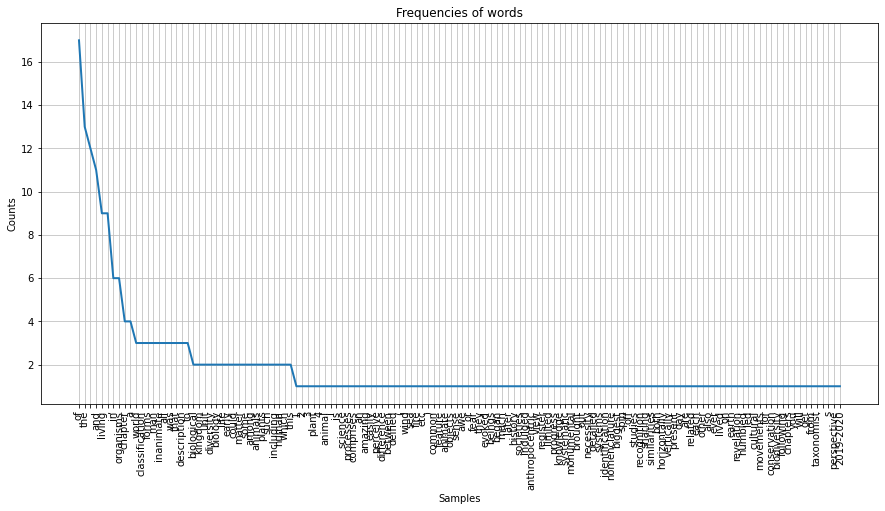

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
freq_dist.plot(title="Frequencies of words")
plt.show()

## Task 5

In [18]:
from nltk import pos_tag
pos = pos_tag(word)

In [19]:
for chunk in nltk.ne_chunk(pos):
    if hasattr(chunk, 'label'):
        print(chunk.label())

In [20]:
part_of_speech = []
for i in pos[:]:
    part_of_speech.append(i[1])

In [21]:
dict_pos = {'(': [], ')': [], ',': [], '.': [], 'CC': [], 'CD': [], 'DT': [], 'IN': [], 'JJ': []
           , 'JJS': [], 'MD': [], 'NN': [], 'NNP': [], 'PRP': [], 'RB': [], 'RBR': [], 'TO': [], 'VB': []
           , 'VBD': [], 'VBG': [], 'VBN': [], 'VBZ': [], 'WDT': [], 'NNS': [], 'VBP': []}
res = np.unique(part_of_speech, axis = 0)
for i in pos:
    for j in range(len(res)):
        if i[1] == res[j]:
            dict_pos[res[j]].append(i[0])

In [22]:
most = 0
smallest = 100000
for key, value in dict_pos.items():
    if isinstance(value, list):
        if most < len(value):
            most = len(value)
            key_most = key
        if smallest > len(value):
            smallest = len(value)
            key_smallest = key
print("Most common:{} {}".format(key_most, most))
print("Smallest :{} {}".format(key_smallest, smallest))

Most common:NN 66
Smallest :( 1
